In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/jarif87/DataSets/main/car_data.csv")

In [4]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
df.shape

(301, 9)

In [6]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [9]:
df.duplicated().sum()

2

In [10]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

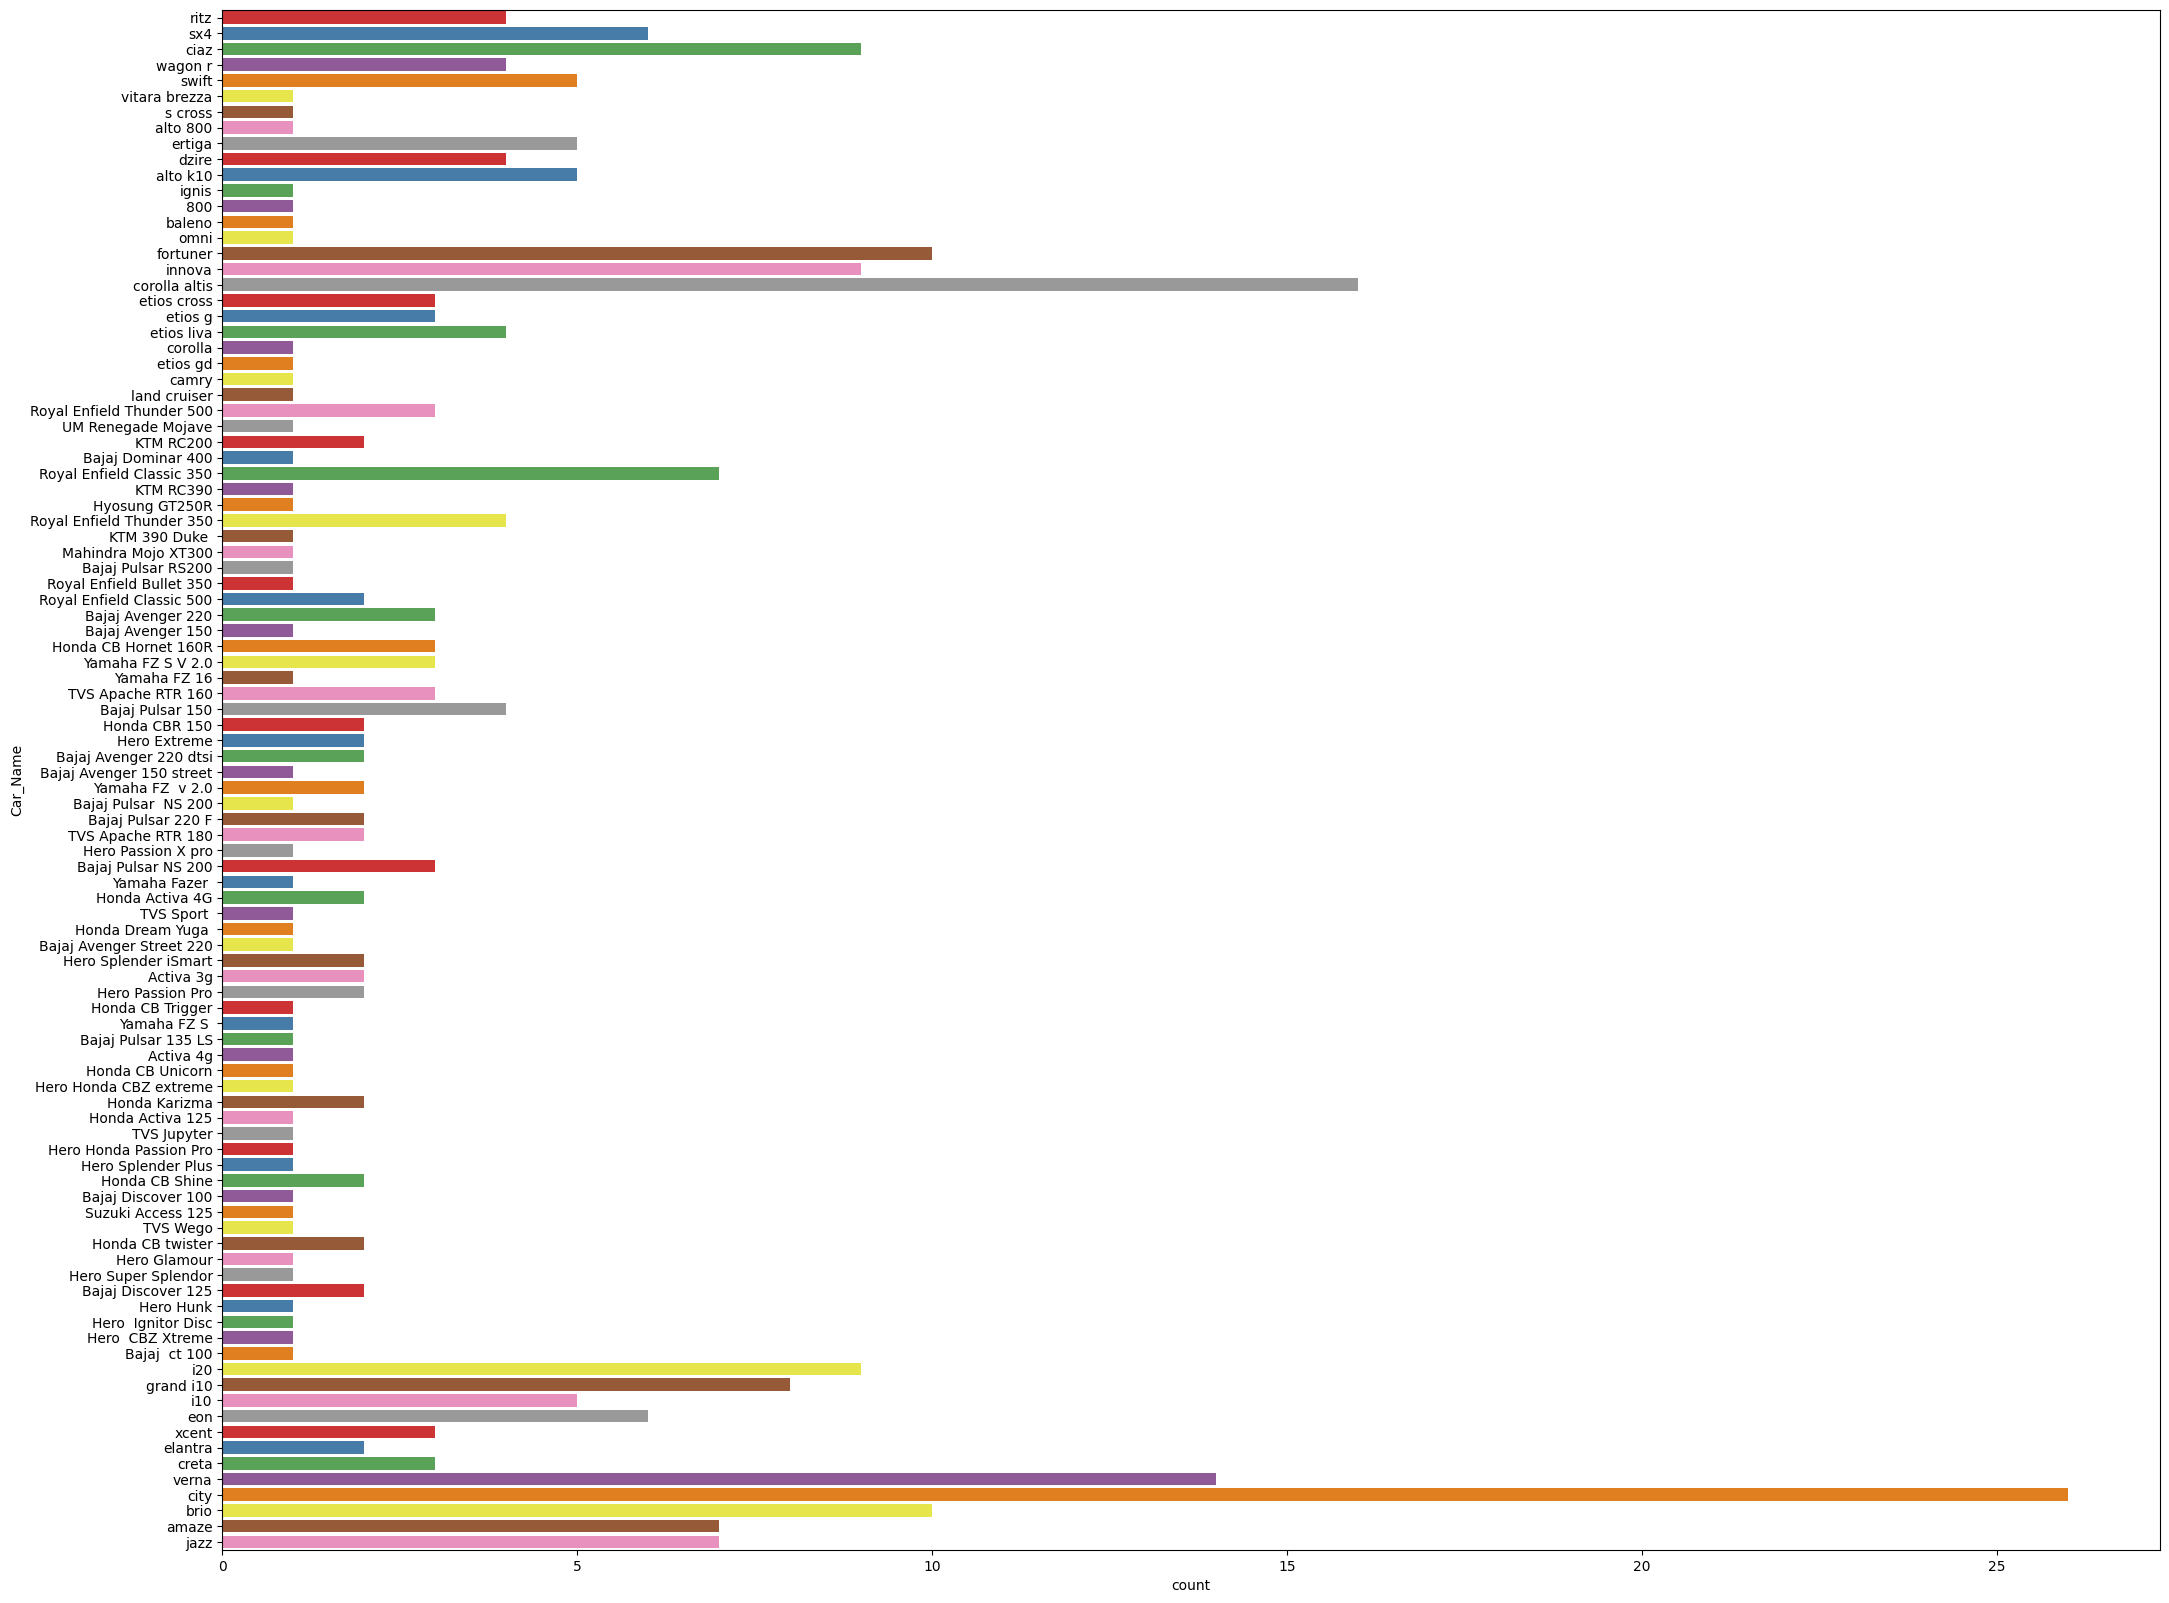

In [11]:
plt.figure(figsize=(25,20))
sns.countplot(y="Car_Name",data=df,palette="Set1")
plt.show()

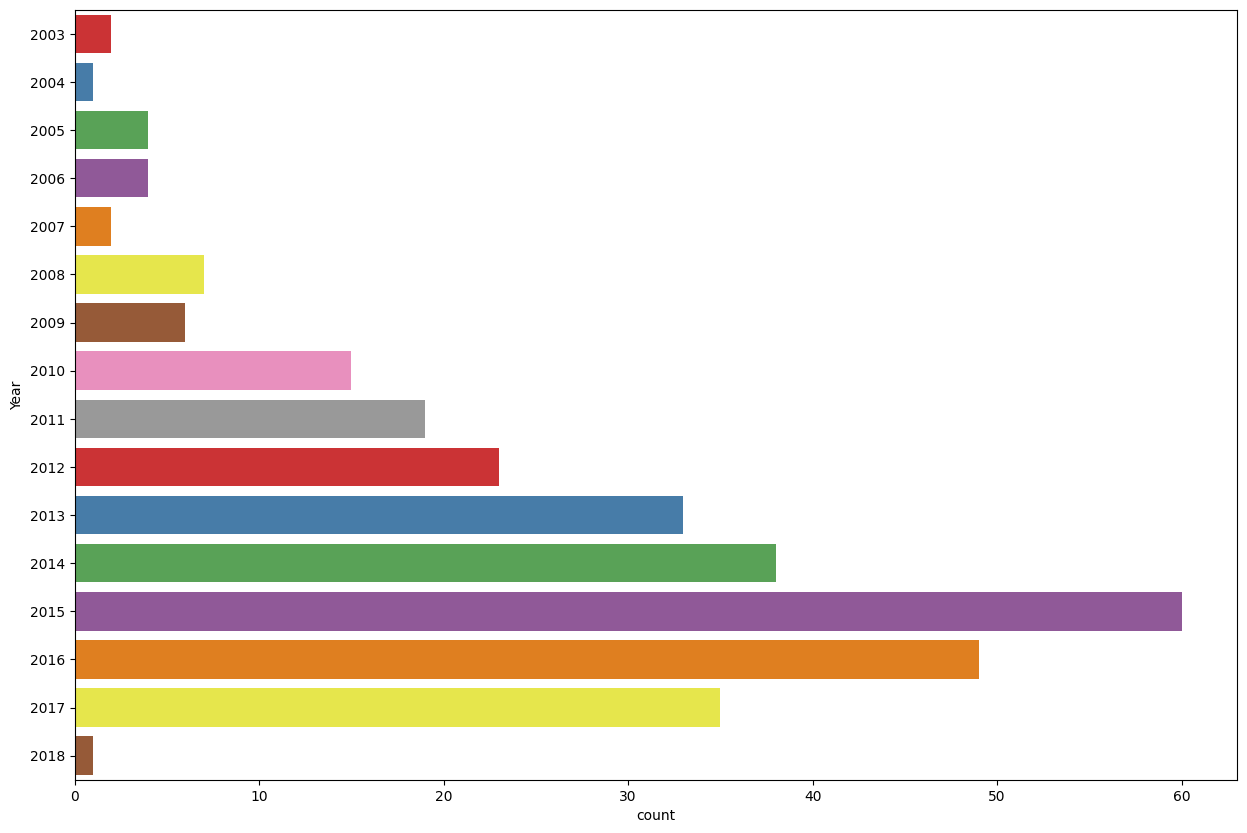

In [12]:
plt.figure(figsize=(15,10))
sns.countplot(y="Year",data=df,palette="Set1")
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(y="Fuel_Type",data=df,palette="Set1")
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(y="Selling_type",data=df,palette="hsv")
plt.show()

ValueError: Could not interpret input 'Selling_type'

<Figure size 1000x600 with 0 Axes>

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(y="Transmission",data=df,palette="brg")
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(y="Owner",data=df,palette="brg")
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="Year", y="Selling_Price", hue="Selling_type")
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="Year", y="Present_Price", hue="Selling_type")
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="Selling_Price", y="Present_Price", hue="Selling_type")
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x="Selling_Price", kde=True,hue="Selling_type")
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x="Present_Price", kde=True,hue="Transmission")
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x="Driven_kms", kde=True,hue="Fuel_Type")
plt.show()

In [ ]:
col=["Car_Name","Fuel_Type","Selling_type","Transmission"]
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for x in col:
    df[x]=label_encoder.fit_transform(df[x])

# Scale data

In [ ]:
scale=["Car_Name","Year","Selling_Price","Present_Price","Driven_kms"]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[scale]=scaler.fit_transform(df[scale])

# GradientBoostingRegressor

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
X=df.drop(columns="Selling_Price",axis=1)
Y=df["Selling_Price"]
x_train, x_test, y_train, y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
gb_regressor.fit(x_train,y_train)
pred1=gb_regressor.predict(x_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test,pred1)
print("Mean Absolute Error (MAE):", mae)
print("==============================================================================")
mse = mean_squared_error(y_test,pred1)
print("Mean Squared Error (MSE):", mse)
print("==============================================================================")
r2 = r2_score(y_test,pred1)
print("R-squared (R2) Score:", r2)
print("==============================================================================")
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test,pred1)
print("Mean Absolute Percentage Error (MAPE):", mape)

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=pred1, color="navy",marker="*",label="best_fit_line")
plt.title('Actual vs Predicted Selling Price')
plt.xlabel('Actual Test Values')
plt.ylabel('Predicted Test Values')
plt.show()

# important feature

In [ ]:
importances = gb_regressor.feature_importances_
feature_names = X.columns 
sorted_indices = np.argsort(importances)
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_names)), importances[sorted_indices], align='center')
plt.xticks(range(len(feature_names)), feature_names[sorted_indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

#  RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(x_train,y_train)
pred2=rf_regressor.predict(x_test)

In [ ]:


mae = mean_absolute_error(y_test,pred2)
print("Mean Absolute Error (MAE):", mae)
print("==============================================================================")
mse = mean_squared_error(y_test,pred2)
print("Mean Squared Error (MSE):", mse)
print("==============================================================================")
r2 = r2_score(y_test,pred2)
print("R-squared (R2) Score:", r2)
print("==============================================================================")
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test,pred2)
print("Mean Absolute Percentage Error (MAPE):", mape)

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=pred2, color="red",marker="P",label="best_fit_line")
plt.title('Actual vs Predicted Selling Price')
plt.xlabel('Actual Test Values')
plt.ylabel('Predicted Test Values')
plt.show()

# important feature

In [ ]:
importances = rf_regressor.feature_importances_
feature_names = X.columns 
sorted_indices = np.argsort(importances)
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_names)), importances[sorted_indices], align='center')
plt.xticks(range(len(feature_names)), feature_names[sorted_indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

# DecisionTreeRegressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor(random_state=42,max_depth=5)
dt_regressor.fit(x_train, y_train)
pred3 = dt_regressor.predict(x_test)

In [ ]:


mae = mean_absolute_error(y_test,pred3)
print("Mean Absolute Error (MAE):", mae)
print("==============================================================================")
mse = mean_squared_error(y_test,pred3)
print("Mean Squared Error (MSE):", mse)
print("==============================================================================")
r2 = r2_score(y_test,pred3)
print("R-squared (R2) Score:", r2)
print("==============================================================================")
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test,pred3)
print("Mean Absolute Percentage Error (MAPE):", mape)

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=pred2, color="green",marker="H",label="best_fit_line")
plt.title('Actual vs Predicted Selling Price')
plt.xlabel('Actual Test Values')
plt.ylabel('Predicted Test Values')
plt.show()

# important feature

In [ ]:
importances = dt_regressor.feature_importances_
feature_names = X.columns 
sorted_indices = np.argsort(importances)
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_names)), importances[sorted_indices], align='center')
plt.xticks(range(len(feature_names)), feature_names[sorted_indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()